In [2]:
import jsonlines
import torchaudio
from pathlib import Path
import torch, random
import librosa, os
import IPython.display as ipd
from dotenv import load_dotenv
from spellchecker import SpellChecker
from dataclasses import dataclass, field
from typing import Any, Dict, List, Optional, Union
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
from collections import defaultdict
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
import pandas as pd
import os
from pathlib import Path
import jsonlines
from dotenv import load_dotenv

load_dotenv()

TEAM_NAME = os.getenv("TEAM_NAME", "7up")
TEAM_TRACK = os.getenv("TEAM_TRACK", "advanced")

input_dir = Path(f"/home/jupyter/{TEAM_TRACK}")
images_dir = input_dir / "images"  # Assuming images are in a subdirectory named "images"

data = {'image': [], 'caption': [], 'bbox': [], 'image_path': []}

with jsonlines.open(input_dir / "vlm.jsonl") as reader:
    for obj in reader:
        image = obj['image']
        annotations = obj['annotations']

        for annotation in annotations:
            caption = annotation['caption']
            bbox = annotation['bbox']
            image_path = os.path.join(images_dir, image)  # Construct the image path

            data['image'].append(image)
            data['caption'].append(caption)
            data['bbox'].append(bbox)
            data['image_path'].append(image_path)  # Add the image path to the dictionary

df = pd.DataFrame(data)
df.head()

,image,caption,bbox,image_path
0,image_0.jpg,grey missile,"[912, 164, 48, 152]",/home/jupyter/advanced/images/image_0.jpg
1,image_0.jpg,"red, white, and blue light aircraft","[1032, 80, 24, 28]",/home/jupyter/advanced/images/image_0.jpg
2,image_0.jpg,green and black missile,"[704, 508, 76, 64]",/home/jupyter/advanced/images/image_0.jpg
3,image_0.jpg,white and red helicopter,"[524, 116, 112, 48]",/home/jupyter/advanced/images/image_0.jpg
4,image_1.jpg,grey camouflage fighter jet,"[1112, 172, 64, 36]",/home/jupyter/advanced/images/image_1.jpg


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.head()

,image,caption,bbox,image_path
11011,image_2018.jpg,orange and black fighter jet,"[244, 40, 56, 60]",/home/jupyter/advanced/images/image_2018.jpg
26255,image_4808.jpg,green and brown camouflage fighter jet,"[1016, 300, 80, 52]",/home/jupyter/advanced/images/image_4808.jpg
19592,image_3594.jpg,white light aircraft,"[676, 336, 76, 44]",/home/jupyter/advanced/images/image_3594.jpg
9683,image_1779.jpg,black fighter plane,"[920, 488, 56, 40]",/home/jupyter/advanced/images/image_1779.jpg
23,image_4.jpg,"white, red, and green fighter plane","[260, 232, 60, 56]",/home/jupyter/advanced/images/image_4.jpg


In [6]:
from datasets import Dataset

dataset = Dataset.from_pandas(df)
dataset

Dataset({
    features: ['image', 'caption', 'bbox', 'image_path'],
    num_rows: 27913
})

In [7]:
from PIL import Image
import torch
import requests
from transformers import CLIPProcessor, CLIPModel
from matplotlib import pyplot as plt
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

image_2.jpg
/home/jupyter/advanced/images/image_2.jpg


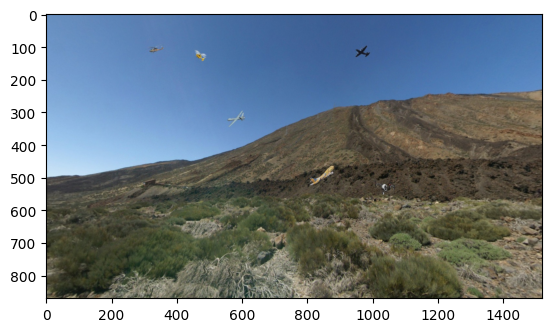

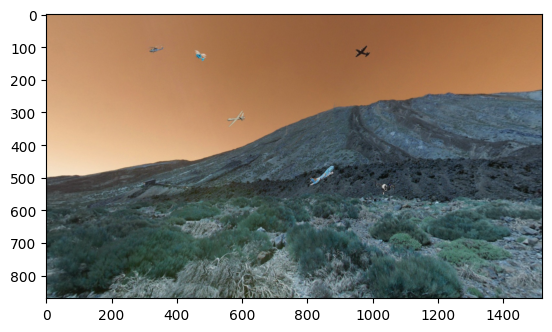

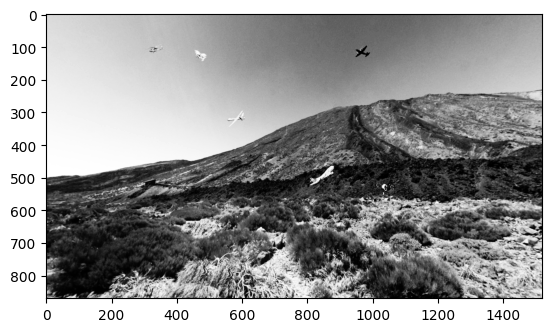

In [41]:
idx = 11
image_path = data['image'][idx]
# Load an image
print(image_path)
image_path = input_dir / "images" / image_path # Change this to your image path
print(image_path)

image = cv2.imread(str(image_path))
plt.imshow(image[...,::-1]) #RGB
plt.show()
plt.imshow(image[...,::]) #BGR
plt.show()
#print(image)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Convert to PIL image
#image = Image.fromarray(image)
#image
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_gray_hist = cv2.equalizeHist(img_gray)

plt.imshow(img_gray_hist[...,::], cmap='gray')
plt.show()

In [31]:
idx = 1
image_path = data['image'][idx]
# Load an image
print(image_path)
image_path = input_dir / "images" / image_path # Change this to your image path
print(image_path)

image = cv2.imread(str(image_path))
#print(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Convert to PIL image
image = Image.fromarray(image)
#image
img_gray_hist = cv2.equalizeHist(image_path)

plt.imshow(img_gray_hist[...,::], cmap='gray')
plt.show()

image_0.jpg
/home/jupyter/advanced/images/image_0.jpg


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'equalizeHist'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [8]:
inputs = processor(text=["a photo of a plane", "a photo of a car"], images=image, return_tensors="pt", padding=True)
with torch.no_grad():
    outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
for prob, label in zip(probs[0], ("plane", "car")):
    print(f"{label}: {prob}")

plane: 0.9583091735839844
car: 0.041690897196531296


In [9]:
#initialize clip model
import torch
from datasets import load_dataset
from PIL import Image
from torchvision.io import ImageReadMode, read_image
from torchvision.transforms import CenterCrop, ConvertImageDtype, Normalize, Resize
from torchvision.transforms.functional import InterpolationMode
from transformers import (
    Trainer,
    TrainingArguments,
    VisionTextDualEncoderModel,
    VisionTextDualEncoderProcessor,
    AutoTokenizer,
    AutoImageProcessor
)

model = VisionTextDualEncoderModel.from_vision_text_pretrained(
    "openai/clip-vit-base-patch32", "FacebookAI/roberta-base"
)

tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")
image_processor = AutoImageProcessor.from_pretrained("openai/clip-vit-base-patch32")
processor = VisionTextDualEncoderProcessor(image_processor, tokenizer)
config = model.config

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The projection layer and logit scale weights `['visual_projection.weight', 'text_projection.weight', 'logit_scale']` are newly initialized. You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)
train_ds[0]

{'image': 'image_2018.jpg',
 'caption': 'orange and black fighter jet',
 'bbox': [244, 40, 56, 60],
 'image_path': '/home/jupyter/advanced/images/image_2018.jpg',
 '__index_level_0__': 11011}

In [11]:
# We use torchvision for faster image pre-processing. The transforms are implemented as nn.Module,
# so we jit it to be faster.
class Transform(torch.nn.Module):
    def __init__(self, image_size, mean, std):
        super().__init__()
        self.transforms = torch.nn.Sequential(
            Resize([image_size], interpolation=InterpolationMode.BICUBIC),
            CenterCrop(image_size),
            ConvertImageDtype(torch.float),
            Normalize(mean, std),
        )

    def forward(self, x) -> torch.Tensor:
        """`x` should be an instance of `PIL.Image.Image`"""
        with torch.no_grad():
            x = self.transforms(x)
        return x

# For preprocessing the datasets.
# Initialize torchvision transforms and jit it for faster processing.
image_transformations = Transform(
    config.vision_config.image_size, image_processor.image_mean, image_processor.image_std
)
image_transformations = torch.jit.script(image_transformations)

In [12]:
def preprocess_dataset(dataset):
    # Preprocessing the datasets.
    data = dataset
    # We need to tokenize inputs and targets.
    column_names = data.column_names

    # 6. Get the column names for input/target.
    image_column = "image_path"
    caption_column = "caption"
    dataset_columns = (image_column, caption_column)

    # Preprocessing the datasets.
    # We need to tokenize input captions and transform the images.
    def tokenize_captions(examples):
        captions = list(examples[caption_column])
        text_inputs = tokenizer(captions, padding="max_length", truncation=True)
        examples["input_ids"] = text_inputs.input_ids
        examples["attention_mask"] = text_inputs.attention_mask
        return examples

    #to change to rgb
    def transform_images(examples):
        images = [read_image(image_file, mode=ImageReadMode.RGB) for image_file in examples[image_column]]
        examples["pixel_values"] = [image_transformations(image) for image in images]
        return examples

    data = data.map(
        function=tokenize_captions,
        batched=True,
        remove_columns=[col for col in column_names if col != image_column],
        desc=f"Running tokenizer on dataset",
    )

    # Transform images on the fly as doing it on the whole dataset takes too much time.
    data.set_transform(transform_images)
    return data

In [13]:
train_dataset = preprocess_dataset(train_ds)
eval_dataset = preprocess_dataset(test_ds)

Running tokenizer on dataset:   0%|          | 0/22330 [00:00<?, ? examples/s]

Parameter 'transform'=<function preprocess_dataset.<locals>.transform_images at 0x7f4a5ae73a30> of the transform datasets.arrow_dataset.Dataset.set_format couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Running tokenizer on dataset:   0%|          | 0/5583 [00:00<?, ? examples/s]

In [14]:
train_dataset

Dataset({
    features: ['image_path', 'input_ids', 'attention_mask'],
    num_rows: 22330
})

In [15]:
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    input_ids = torch.tensor([example["input_ids"] for example in examples], dtype=torch.long)
    attention_mask = torch.tensor([example["attention_mask"] for example in examples], dtype=torch.long)
    return {
        "pixel_values": pixel_values,
        "input_ids": input_ids,
        "attention_mask": attention_mask,
        "return_loss": True,
    }

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [17]:
torch.cuda.empty_cache()


In [20]:
# initialize Trainer
training_args = TrainingArguments(
    learning_rate=5e-5,
    warmup_steps=0,
    weight_decay=0.1,
    per_device_train_batch_size=16,
    remove_unused_columns=False,
    output_dir="clip-finetune",
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=collate_fn,
)
train_result = trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Step,Training Loss
500,2.081100
1000,2.079600
1500,2.079500
2000,2.079500
2500,2.079400
3000,2.076800
3500,2.079400
4000,2.079500
4500,2.079500
5000,2.079400


In [21]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 2.0792739391326904, 'eval_runtime': 408.2724, 'eval_samples_per_second': 13.675, 'eval_steps_per_second': 1.71, 'epoch': 3.0}


In [1]:
trainer.save_model()
tokenizer.save_pretrained("clip-finetune")
image_processor.save_pretrained("clip-finetune")

NameError: name 'trainer' is not defined